#                      GOOGLE PLAY STORE APPLICATIONS ANALYSATION

# Danh sách nhóm: 
- Trần Phúc Khánh 20110221 (Nhóm trưởng)
- Trần Quang Khánh 20110660
- Lê Minh Tường 20110280
- Nguyễn Văn Lâm 20110668


## A: Giới thiệu và mô tả dữ liệu

## 1. Giới thiệu

*Về Google Play Store*

*Google Play* là một dịch vụ phân phối kỹ thuật số được điều hành và phát triển bởi Google LLC, đóng vai trò là kho ứng dụng chính thức cho hệ điều hành Android, cho phép người dùng duyệt và tải xuống các ứng dụng được phát triển với bộ công cụ phát triển phần mềm Android (SDK) và được xuất bản thông qua Google.

*Nguồn dữ liệu*
Dữ liệu này được lấy từ Google Play Store trong khoảng thời gian đầu năm 2018. 



## 2. Các thư viện sử dụng

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

## 3. Dữ liệu của dataset 

*(Dữ liệu này gồm 13 cột, 10839 dòng)*

- Name
- Categary
- Rating
- Reviews
- Size
- Install
- Type
- Price
- Content Rating
- Genres
- Last Updated 
- Current Ver
- Android Ver

In [30]:
df = pd.read_csv('data/googleplaystore.csv')
df.head(5).append(df.tail(5))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
10835,FQ India,LIFESTYLE,NaN,0,8.90,10,Free,0,Everyone,Lifestyle,31-Jul-18,7.2.2,4.1 and up
10836,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,36.00,10,Free,0,Everyone,News & Magazines,5-Apr-18,3.8,4.4 and up
10837,Word Search Tab 1 FR,FAMILY,NaN,0,1.02,50,Paid,$1.04,Everyone,Puzzle,6-Feb-12,1.1,3.0 and up
10838,PLMGSS FR,PRODUCTIVITY,NaN,0,3.10,10,Free,0,Everyone,Productivity,1-Dec-17,1,4.4 and up
10839,FR Forms,BUSINESS,NaN,0,9.60,10,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


## 4. Giải thích các biến số

- Name
- Categary
- Rating
- Reviews
- Size
- Install
- Type
- Price
- Content Rating
- Genres
- Last Updated 
- Current Ver
- Android Ver

## 5. Data Cleaning

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


*Kết quả cho thấy dataset có tổng cộng 10841 dòng, với 12 cột. Không có cột nào có giá trị null.*

In [32]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               460
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2783
Android Ver         33
dtype: int64

*Qua kết quả trên cho thấy số trường hợp của các biến phân loại:*
- Category: 34 loại khác nhau
- Type: 3 loại khác nhau
- Content Rating: 6 loại khác nhau
- Genres: 120 loại khác nhau

**Xử lí dữ liệu rác và ép kiểu**

Do dữ liệu ở cột **Installs** dùng dấu ',' để phân cách phần thập phân và ở dạng xâu, ta phải thay thế dấu ',' bằng dấu '.' và ép kiểu sang số.

In [33]:
lst = df.Installs.tolist()

n = len(lst)
for i in range(n):
    lst[i] = str(lst[i]).replace(',','')
    
#lst.remove("Free") #Có một dòng bị mang giá trị này nên phải xoá bỏ dòng đó để có thể ép kiểu

lst = pd.Series(lst)
df.Installs = lst

df.Installs = df.Installs.astype(float)

Chuyển dữ liệu cột **Size** (MB) sang dạng float

In [34]:
lst = df.Size.tolist()

#lst.remove("1,000+")
lst = pd.Series(lst)
df.Size = lst

df.Size = df.Size.astype(float)

Chuyển dữ liệu ở cột **Reviews** sang dạng float

In [35]:
lst = df.Reviews.tolist()

#lst.remove("3.0M")
lst = pd.Series(lst)
df.Reviews = lst

df.Reviews = df.Reviews.astype(float)

Kiểu dữ liệu của các cột sau khi xử lí:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


**Xoá bỏ những dòng có dữ liệu NaN**

In [37]:
df=df.dropna(axis=0)

# B - Các câu hỏi nghiên cứu

**1. Sự khác biệt về thể loại ứng dụng (Category) có ảnh hưởng đến số lượt tải (Installs) của ứng dụng không ?**
- X: thể loại ứng dụng

- Y: số lượt tải của ứng dụng tương ứng 

- Bài toán: C --> Q nhiều nhóm độc lập

**2. Liệu thể loại ứng dụng (Category) có ảnh hưởng tới độ tuổi quy định (Content Rating) hay không ?**
- X: thể loại ứng dụng
- Y: độ tuổi quy định ứng dụng
- Bài toán: C --> C nhiều nhóm độc lập

**3. Sự ảnh hưởng của độ tuổi quy định (Content Rating) tới điểm đánh giá ứng dụng (Rating) trên CH play.**
- X: độ tuổi được quy định trong ứng dụng
- Y: điểm đánh giá của người dùng
- Bài toán: C --> Q nhiều nhóm độc lập


**4. Các ứng dụng trả phí và không trả phí có sự khác biệt như thế nào về đánh giá của người dùng, liệu có phải những ứng dụng trả phí được đánh giá cao hơn không ?**
- X: loại ứng dụng (trả phí hoặc miễn phí)
- Y: điểm đánh giá của người dùng
- Bài toán: C --> Q 2 nhóm độc lập

# C - Trực quan hoá dữ liệu, thực nghiệm và kết luận

## Câu hỏi 1: Sự khác biệt về thể loại ứng dụng (Category) có ảnh hưởng đến số lượt tải (Installs) của ứng dụng không ?

In [38]:
ts = pd.DataFrame(df, columns=['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver'])
gk = ts.groupby('Category')['Installs'].agg({'sum','count', 'mean','median','var'})
pd.reset_option('^display.', silent=True)
pd.set_option("display.precision", 2)

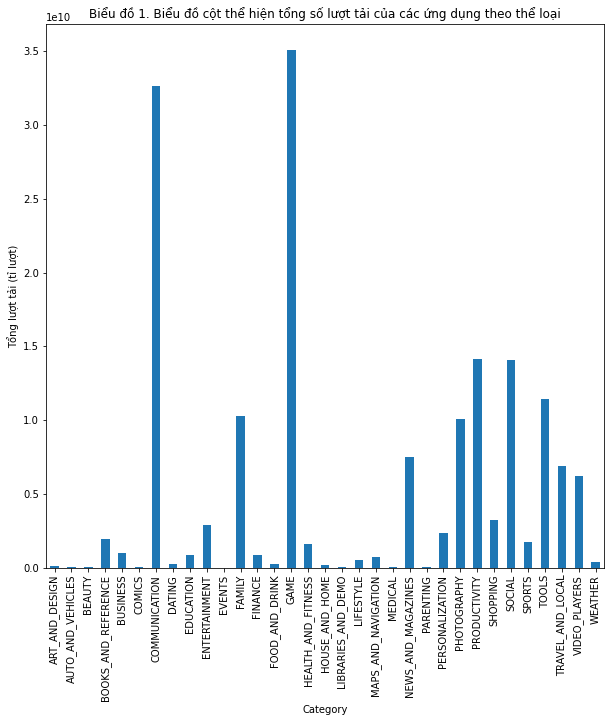

In [39]:
plt.figure(figsize=(10,10))
gk['sum'].plot.bar()
plt.title('Biểu đồ 1. Biểu đồ cột thể hiện tổng số lượt tải của các ứng dụng theo thể loại')
plt.xlabel('Category')
plt.ylabel('Tổng lượt tải (tỉ lượt)')
plt.show()

In [40]:
print("Bảng 1: Bảng giá trị mean, var, count, sum và median lượt tải (Installs) các ứng dụng theo thể loại (Category) \n")

gk.sort_values(by='sum',ascending = False)
print(gk)

Bảng 1: Bảng giá trị mean, var, count, sum và median lượt tải (Installs) các ứng dụng theo thể loại (Category) 

                       median  count       sum      mean       var
Category                                                          
ART_AND_DESIGN       1.00e+05     61  1.24e+08  2.04e+06  4.71e+13
AUTO_AND_VEHICLES    1.00e+05     73  5.31e+07  7.28e+05  3.48e+12
BEAUTY               1.00e+05     42  2.69e+07  6.41e+05  2.86e+12
BOOKS_AND_REFERENCE  1.00e+05    178  1.92e+09  1.08e+07  5.89e+15
BUSINESS             5.00e+04    303  1.00e+09  3.31e+06  1.54e+14
COMICS               1.00e+05     58  5.60e+07  9.66e+05  4.55e+12
COMMUNICATION        5.00e+06    328  3.26e+10  9.95e+07  6.25e+16
DATING               1.00e+05    195  2.64e+08  1.36e+06  8.28e+12
EDUCATION            1.00e+06    155  8.71e+08  5.62e+06  2.51e+14
ENTERTAINMENT        5.00e+06    149  2.87e+09  1.93e+07  7.18e+15
EVENTS               5.00e+04     45  1.59e+07  3.54e+05  1.11e+12
FAMILY          

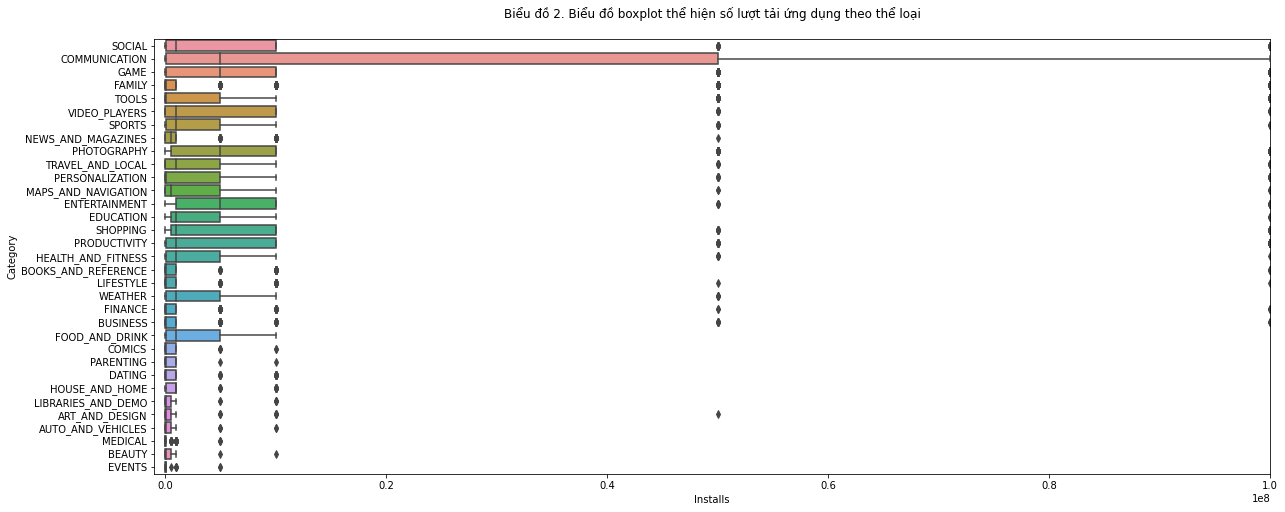

In [41]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data = df, x = "Installs", y = "Category")
ax.set_xlim(-1000000,100000000)
plt.title('Biểu đồ 2. Biểu đồ boxplot thể hiện số lượt tải ứng dụng theo thể loại\n')
plt.show()

**Nhận xét: Qua biểu đồ ta thấy được**
- Hầu như mỗi nhóm thể loại đều có các outlier
- Các outlier có giá trị cách biệt rất lớn với Median của mỗi nhóm
- Những nhóm ứng dụng có tập giá trị phân bố đều nhất là: Communication (Ứng dụng để giao tiếp), Entertainment (Ứng dụng giải trí), Education (Ứng dụng giáo dục), Heath_and_fitness (Ứng dụng cho sức khoẻ & thể hình), Game, Social (Ứng dụng xã hội), Shopping (Ứng dụng mua sắm),....

## *KẾT LUẬN*: Các thể loại ứng dụng có ảnh hưởng đến số lượt tải & sử dụng, qua kết quả thực nghiệm phân ra làm 3 nhóm các thể loại ứng dụng:

 **- Nhóm thể loại các ứng dụng được ưa chuộng nhất:** Communication, Social, Video Players, Photography, Entertainment, Shopping, Productivity

**- Nhóm thể loại các ứng dụng khá phổ biến:** Tools, Sports, Travel & Local, Personalization, Maps & Navigation, Education, Health & Fitness, Weather, Food & Drink

**- Nhóm các thể loại ứng dụng ít được sử dụng:** News & Magazines, Life style, Finance, Comics, Parenting, Family, House & Home, Art & Design... 

# Câu hỏi 2: Liệu thể loại ứng dụng (Category) có ảnh hưởng tới độ tuổi quy định của ứng dụng (Content Rating) hay không ?

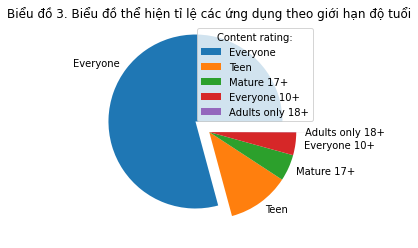

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


In [42]:
CR_pie = df['Content Rating'].value_counts()

CR_pie_keys = ['Everyone','Teen','Mature 17+','Everyone 10+', 'Adults only 18+','']

CR_pie_explode = [0.2, 0, 0, 0,0, 0.2]

plt.pie(CR_pie.values,labels = CR_pie_keys, explode = CR_pie_explode)

plt.title("Biểu đồ 3. Biểu đồ thể hiện tỉ lệ các ứng dụng theo giới hạn độ tuổi")

plt.legend(title = "Content rating:")

plt.show()

print(CR_pie)

**Qua biểu đồ ta thấy Content Rating (giới  hạn độ tuổi) của các ứng dụng chiếm tỉ lệ từ cao nhất đến thấp nhất là: **
1. Everyone
2. Teen
3. Mature 17+
4. Everyone 10+
5. Adult only 18+

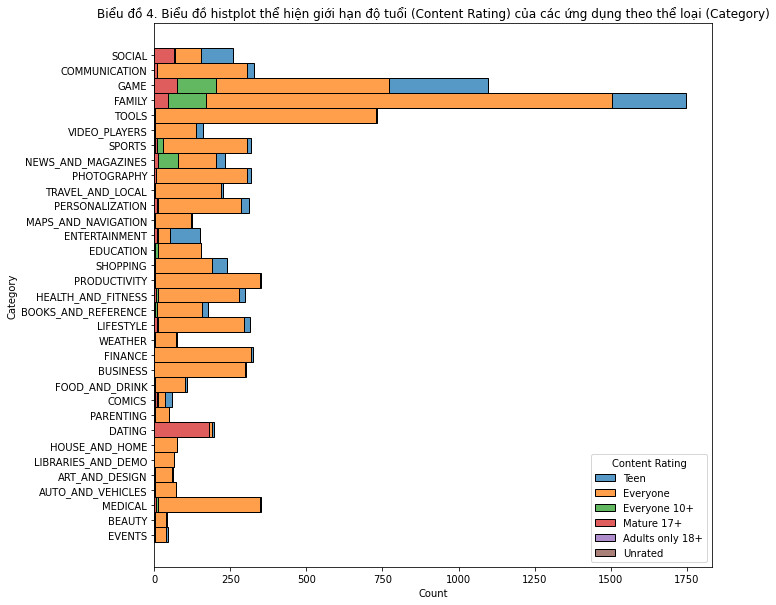

In [43]:
plt.figure(figsize=(10,10))
ax = sns.histplot(data = df, y = "Category", hue = "Content Rating", multiple='stack')
#plt.legend("Content Rating")
plt.title("Biểu đồ 4. Biểu đồ histplot thể hiện giới hạn độ tuổi (Content Rating) của các ứng dụng theo thể loại (Category)")
plt.show()

## *KẾT LUẬN*:  Các thể loại ứng dụng khác nhau có khác biệt về độ tuổi quy định khác nhau, qua kết quả thực nghiệm ta thấy:

**- Nhóm các thể loại ứng dụng với độ tuổi quy định cho *Everyone* chiếm phần lớn:** Hầu hết các thể loại, trừ Dating, Entertainment và Comic.

**- Nhóm các thể loại ứng dụng với độ tuổi quy định cho *Teen* chiếm phần lớn:** Social, Game, Entertainment, Comic.

**- Nhóm các thể loại ứng dụng với độ tuổi quy định cho *Everyone 10+* chiếm phần lớn:** Game, Family, News & Magazine.

**- Nhóm các thể loại ứng dụng với độ tuổi quy định cho *Everyone 17+* chiếm phần lớn:** Dating, Social, Game.

**- Nhóm các thể loại ứng dụng với độ tuổi quy định *Adults only 18+* là chiếm rất ít trong hầu hết mọi thể loại**


## Câu hỏi 3: Sự ảnh hưởng của độ tuổi quy định (Content Rating) tới điểm đánh giá ứng dụng (Rating) như thế nào ?

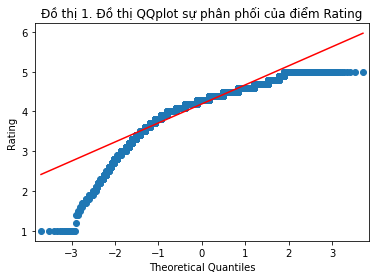

In [53]:
fig = sm.qqplot(df['Rating'],line="r")
plt.ylabel('Rating')
plt.title('Đồ thị 1. Đồ thị QQplot sự phân phối của điểm Rating')
plt.show()

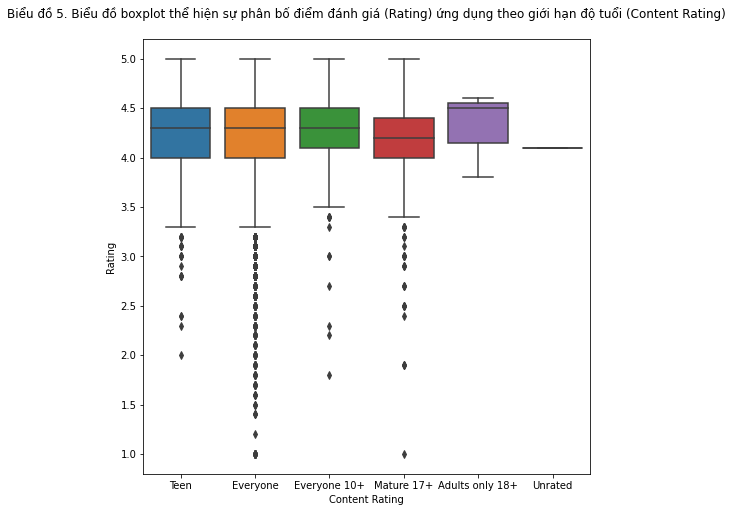

In [45]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data = df, x = "Content Rating", y = "Rating")
plt.title("Biểu đồ 5. Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá (Rating) ứng dụng theo giới hạn độ tuổi (Content Rating)\n")
plt.show()

**Nhận xét:**

Qua biểu đồ ta nhận thấy:
- Các ứng dụng cho mọi người (Everyone) có rất nhiều các outlier và rải rác đều.
- Các ứng dụng cho người lớn (Adults only 18+) hoàn toàn không có outlier.
- Các ứng dụng không được phân loại độ tuổi (Unrated) có quá ít nên không thể hiện trên biểu đồ được.

In [46]:
print("Bảng 2: Bảng giá trị mean, var, count, sum và median của điểm đánh giá (Rating) theo độ tuổi quy định(Content Rating) \n")

ts = pd.DataFrame(df, columns=['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver'])
gk = ts.groupby('Content Rating')['Rating'].agg({'sum','count', 'mean','median','var'})

pd.reset_option('^display.', silent=True)
pd.set_option("display.precision", 2)

gk = gk.sort_values(by='sum',ascending=False)

# pd.set_option('display.float_format', lambda x: '%.f' % x)

print(gk)

Bảng 2: Bảng giá trị mean, var, count, sum và median của điểm đánh giá (Rating) theo độ tuổi quy định(Content Rating) 

                 median  count      sum  mean   var
Content Rating                                     
Everyone            4.3   7414  31038.5  4.19  0.29
Teen                4.3   1084   4589.1  4.23  0.15
Mature 17+          4.2    461   1900.9  4.12  0.26
Everyone 10+        4.3    397   1690.1  4.26  0.13
Adults only 18+     4.5      3     12.9  4.30  0.19
Unrated             4.1      1      4.1  4.10   NaN


## *KẾT LUẬN*: 

- Các ứng dụng dành cho người trưởng thành *(Mature 17+)* được đánh giá thấp hơn so với các Content Rating còn lại.

- Các ứng dụng dành cho thanh thiếu niên *(Teen)* và người trên 10 tuổi *(Everyone 10+)* hầu hết được đánh giá khá cao và đều, các ứng dụng được đánh giá thấp chiếm phần ít.

- Các ứng dụng dành cho mọi người *(Everyone)* nhìn chung được đánh giá khá cao tuy nhiên do nhóm các ứng dụng này là phổ biến nhất nên điểm đánh giá phân bố rộng.

- Các ứng dụng dành cho người lớn *(Adults only 18+)* được đánh giá cao nhất, các ứng dụng này được thiết kế tốt và đáp ứng được nhu cầu của người dùng.


## Câu hỏi 4: Các ứng dụng trả phí và không trả phí có sự khác biệt như thế nào về đánh giá của người dùng, liệu có phải những ứng dụng trả phí được đánh giá cao hơn không ? 

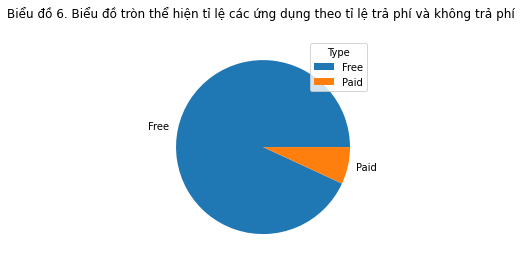

Free    8715
Paid     645
Name: Type, dtype: int64


In [47]:
Type_pie = df['Type'].value_counts()

Type_pie_keys = ['Free','Paid']

Type_pie_explode = [0,0]

plt.pie(Type_pie.values,labels = Type_pie_keys, explode = Type_pie_explode)

plt.title('Biểu đồ 6. Biểu đồ tròn thể hiện tỉ lệ các ứng dụng theo tỉ lệ trả phí và không trả phí \n')

plt.legend(title = "Type")

plt.show()

print(Type_pie)

**Qua biểu đồ ta thấy Type (Loại ứng dụng) của các ứng dụng chủ yếu là miễn phí, những ứng dụng trả phí chỉ chiếm phần khá nhỏ.**

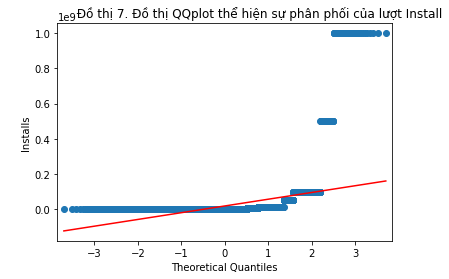

In [51]:
fig = sm.qqplot(df['Installs'],line="r")
plt.ylabel('Installs')
plt.title('                  Đồ thị 7. Đồ thị QQplot thể hiện sự phân phối của lượt Install')
plt.show()

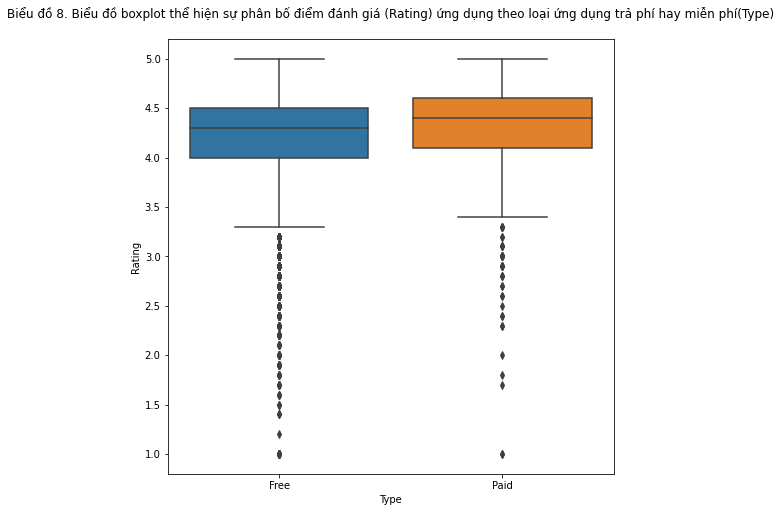

In [52]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data = df, x = "Type", y = "Rating")
plt.title("Biểu đồ 8. Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá (Rating) ứng dụng theo loại ứng dụng trả phí hay miễn phí(Type)\n")
plt.show()

## *KẾT LUẬN*:
   **Các ứng dụng trả phí được người dùng đánh giá cao hơn so với các ứng dụng miễn phí.** Điều này cho thấy:
   
        - Các ứng dụng trả phí được thiết kế để đáp ứng nhu cầu của người dùng là tốt hơn.
        - Những người dùng ứng dụng miễn phí có xu hướng đánh giá chủ quan và qua loa, không được khách       quan so với những người dùng ứng dụng trả phí.

<AxesSubplot:title={'center':'Biểu đồ 8. thể hiện sự tương quan giữa Rating, Reviews, Size, Installs\n'}>

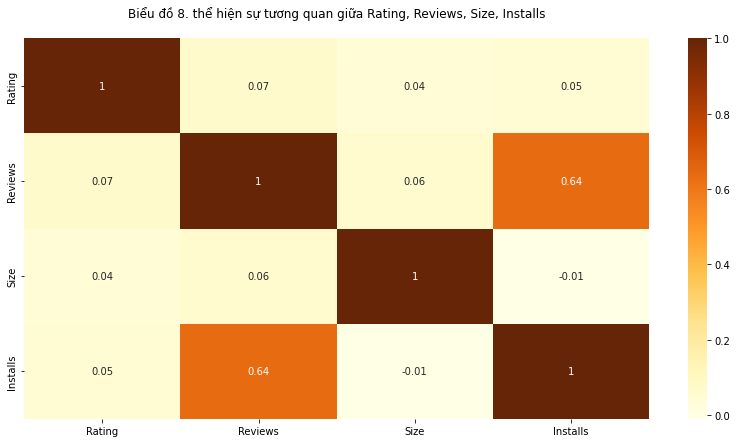

In [50]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
plt.title('Biểu đồ 8. thể hiện sự tương quan giữa Rating, Reviews, Size, Installs\n')
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# THANKS FOR WATCHING